# Homework 1 - data validation & cleaning (deadline 31. 10. 2020)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in details: It is up to you to come up with ideas on how to fulfill the particular tasks as best you can!

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  2. Check consistency (i.e. that same things are represented in the same way) of at least three features where you expect problems (include "Object Name" feature). You can propose how to clean selected features, however do not apply cleaning (in your interest) :)
  3. Select some features where you expect integrity problems (describe your choice) and check integrity of those features. By integrity we mean correct logical relations between features (e.g. female names for females only).
  4. Convert at least five features to a proper data type. Choose at least one numeric, one categorical and one datetime.
  5. Find some outliers (describe your method).
  6. Detect missing data in at least three features, convert them to a proper representation (if they are already not), and impute missing values in at least one feature.

**If you do all this properly, you will obtain 16 points.** However, all your steps and following code **have to be commented!**

To earn **two points** for extra activity you can do some of these:
  * Focus more precisely on cleaning of the "Medium" feature. Such if you like to use it in KNN based algorithms later.
  * Focus on the extraction of physical dimensions of each item (width, depth and height in centimeters) from the "Dimensions" feature.

## Comments

  * Please follow the instructions from https://courses.fit.cvut.cz/MI-PDD/homeworks/index.html.
  * If the reviewing teacher is not satisfied, she can (!) give you another chance to rework your homework and to obtain more points. However, this is not a given, so do your best! :)

# New Section

In [119]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [120]:
# Only basic libraries here
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [121]:
df = pd.read_csv('/content/drive/My Drive/MetObjects.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,7,10,11,12,13,14,15,22,34,35,36,37,38,39,40,41,42,43,44,46) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [122]:
# obtain basic data info
display(df.shape) # prints the amount of rows and column numbers
display(df.dtypes) # lists data types of all columns
display(df.info()) # basic info about entries including number of non-null values
display(df.nunique()) # basic info about entries including number of non-null values

(474526, 54)

Object Number               object
Is Highlight                  bool
Is Timeline Work              bool
Is Public Domain              bool
Object ID                    int64
Gallery Number              object
Department                  object
AccessionYear               object
Object Name                 object
Title                       object
Culture                     object
Period                      object
Dynasty                     object
Reign                       object
Portfolio                   object
Constiuent ID               object
Artist Role                 object
Artist Prefix               object
Artist Display Name         object
Artist Display Bio          object
Artist Suffix               object
Artist Alpha Sort           object
Artist Nationality          object
Artist Begin Date           object
Artist End Date             object
Artist Gender               object
Artist ULAN URL             object
Artist Wikidata URL         object
Object Date         

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474526 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            474526 non-null  object 
 1   Is Highlight             474526 non-null  bool   
 2   Is Timeline Work         474526 non-null  bool   
 3   Is Public Domain         474526 non-null  bool   
 4   Object ID                474526 non-null  int64  
 5   Gallery Number           54386 non-null   object 
 6   Department               474526 non-null  object 
 7   AccessionYear            470560 non-null  object 
 8   Object Name              473172 non-null  object 
 9   Title                    444655 non-null  object 
 10  Culture                  206456 non-null  object 
 11  Period                   90362 non-null   object 
 12  Dynasty                  23144 non-null   object 
 13  Reign                    11180 non-null   object 
 14  Port

None

Object Number              471737
Is Highlight                    2
Is Timeline Work                2
Is Public Domain                2
Object ID                  474526
Gallery Number                590
Department                     19
AccessionYear                 264
Object Name                 28076
Title                      235671
Culture                      7088
Period                       1796
Dynasty                       386
Reign                         378
Portfolio                    3407
Constiuent ID               44847
Artist Role                  6641
Artist Prefix                5548
Artist Display Name         62961
Artist Display Bio          47265
Artist Suffix                1751
Artist Alpha Sort           62961
Artist Nationality           3772
Artist Begin Date           25683
Artist End Date             25887
Artist Gender                 276
Artist ULAN URL             34159
Artist Wikidata URL         14170
Object Date                 31957
Object Begin D

In [123]:
df.head()

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,NaN,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,NaN,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [124]:

df['Metadata Date'].unique() #nema zadne hodnoty
#df_no_Metadata_Date = df.drop(columns=['Metadata Date'])

array([nan])

In [125]:
#2- Konzistence pro sloupec 'Artist Gender', předpokládáme dvě pohlaví, ale po prohlédnutí hodnot je vidět, 
#že i při vyčištění různých tvarů na 'male' a 'female' skončíme jen s nan a female. Po prohlédnutí dat je znát,
#že jen ženské pohlaví je zaznamenáno, v opačném případě je hodnota prázdná. Pro více umělců je hodnota oddělena '|',
#proto se objevuje mnoho různých variací zapsání pohlaví. Problémem je ale, že chybějící hodnota může znamenat mužské,
#neznámé, nebo "pohlaví" společnosti, která předmět vytvořila. Proto není doplnění hodnoty triviální, musel by být řešen
#podle zaznamenaných jmen.
display(df['Artist Gender'].unique()[:10])
print()

df_Cleaned_Gender = df.copy()

def clean(s):
  f = 'female'
  m = 'male'
  if f in str(s).lower():
    return f
  elif m in str(s).lower():
    return m
  return str(s).lower()

df_Cleaned_Gender['Artist Gender'] = [ clean(s) for s in df_Cleaned_Gender['Artist Gender']]
display(df_Cleaned_Gender['Artist Gender'].unique()[:10])
print()

display(df[df['Artist Gender'].astype(str).str.contains('Female')].head())

array([nan, '|', '|Female', '||', '||||', 'Female|', 'Female', '|||',
       'Female|Female', '||Female'], dtype=object)

array(['nan', '|', 'female', '||', '||||', '|||', '||||||||',
       '|||||||||||||||||||||||||||', '||||||', '|||||'], dtype=object)

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
241,25.173a–o,True,True,False,282,700,The American Wing,1925,Window,Autumn Landscape,American,NaN,NaN,NaN,NaN,162541353,Maker|Designer,Attributed to,Tiffany Studios|Agnes F. Northrop,"1902–32|American, Flushing, New York 1857–1953...",NaN,"Tiffany Studios |Northrop, Agnes F.",NaN,1902 |1857,1932 |1953,|Female,http://vocab.getty.edu/page/ulan/500331813|,https://www.wikidata.org/wiki/Q19587243|,1923–24,1923,1924,Leaded Favrile glass,132 x 102 in. (335.3 x 259.1 cm),"Gift of Robert W. de Forest, 1925",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Glass,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q83560015,NaN,"Metropolitan Museum of Art, New York, NY",Windows|Waterfalls|Landscapes|Autumn,http://vocab.getty.edu/page/aat/300002944|http...,https://www.wikidata.org/wiki/Q35473|https://w...
742,1986.307.1,False,False,False,811,774,The American Wing,1986,Bowl,Bowl,American,NaN,NaN,NaN,NaN,1254123,Decorator|Manufacturer,Manufactured by,"Clara Chipman Newton|Ceramic Art Company, Tren...","1848–1936|American, 1889–1896",NaN,"Newton, Clara Chipman|Ceramic Art Company",NaN,1848 |1889,1936 |1896,Female|,(not assigned)|http://vocab.getty.edu/page/ula...,https://www.wikidata.org/wiki/Q18588966|,ca. 1890–95,1887,1895,"Porcelain, overglaze enamel decoration and rai...",H. 3 5/8 in. (9.2 cm); Diam. 6 1/4 in. (15.9 cm),"Purchase, Friends of the American Wing Fund an...",Made in|Made in,Cincinnati|Trenton,NaN,NaN,United States|United States,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q98224422,NaN,"Metropolitan Museum of Art, New York, NY",Leaves,http://vocab.getty.edu/page/aat/300011892,https://www.wikidata.org/wiki/Q33971
870,"22.186a, b",True,False,False,948,706,The American Wing,1922,Jar,Covered jar,American,NaN,NaN,NaN,NaN,16277,Maker,NaN,Marie Zimmermann,"American, Brooklyn, New York 1879–1972 Punta G...",NaN,"Zimmermann, Marie",American,1879,1972,Female,(not assigned),https://www.wikidata.org/wiki/Q6763088,1905–15,1905,1915,"Silver, gold, jade, crystal, and rubies",Overall: 6 1/2 x 3 5/16 x 2 3/8 in. (16.5 x 8....,"Purchase, Edward C. Moore Jr. Gift, 1922",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Silver,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q98224424,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1022,65.140,False,False,False,1107,773,The American Wing,1965,Brooch,Cameo,American,NaN,NaN,NaN,NaN,1302130,Maker|Designer,Carved by|Designed by,Beth Benton Sutherland|Izabel M. Coles,1898–1972|born ca. 1890,NaN,"Sutherland, Beth Benton|Coles, Izabel M.",NaN,1898 |1880,1972 |9999,Female|,|,|,1929,1929,1929,"Gold, moonstone, diamonds, emeralds",1 1/2 x 1 7/8 in. (3.8 x 4.8 cm),"Gift of Malcolm P. Aldrich, 1965",Made in,New York,NaN,NaN,United States,NaN,NaN,NaN,NaN,NaN,NaN,Jewelry,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Portraits|Men|Profiles,http://vocab.getty.edu/page/aat/300015637|http...,https://www.wikidata.org/wiki/Q134307|https://...
1137,34.82.2,False,False,False,1229,NaN,The American Wing,1934,Medal,Mr. and Mrs. Robert W. de Forest,American,NaN,NaN,NaN,NaN,16374,Artist,NaN,Evelyn Beatrice Longman,"Americ

In [126]:
#2 "Object Name" - Mnoho záznamů má takto občas specifičtější popis než ostatní.
#Například některé mince jsou označeny jen jako "Coin", zatímco některé jsou konkrétně označené jako třeba "Peso". 
#Podobný problém je třeba u kartiček "Baseball card", které jsou někdy ještě dále specifikovány, jako například "Baseball card, print", což znovu tuto skupinu rozděluje.
#Dalším problémem jsou nekonzistence ve velikostech písmen, krabička od karet je třeba zaznamenána jako "Card case", ale i jako "Card Case".
display(df.head(17).tail(4)['Object Name']) #Ukazuje Peso a Coin
print()
#display(df[df['Object Name'].astype(str).str.contains('Baseball card')].head(20))
val_cnt = df['Object Name'].value_counts()
display(val_cnt[val_cnt.index.astype(str).str.lower().str.contains('baseball card')]) #Různé verze baseballových karet
print()
display(val_cnt[val_cnt.index.astype(str).str.lower().str.contains('painting')]) #Různě konkrétně popsané obrazy
print()
display(val_cnt[val_cnt.index.astype(str).str.lower().str.contains('card case')].head(20)) #Různé velikosti písmen u krabiček od karet
print()
lower_object_name = df['Object Name'].astype(str).str.lower()
display('Počet názvů s různými velikostmi písem: ' + str(df['Object Name'].nunique() - lower_object_name.nunique()))


13    Coin
14    Coin
15    Peso
16    Peso
Name: Object Name, dtype: object

Baseball card                2440
Baseball card, print         2409
Baseball card, photograph    2099
Print baseball card           537
Photograph, baseball card      35
Print, baseball card           34
Photograph baseball card       33
Name: Object Name, dtype: int64

Painting                                                5877
Painting, miniature                                      948
Bark painting                                            338
Snuffbox, painting                                        68
Wall painting                                             47
                                                        ... 
Wall paintings on black ground                             1
Set of ten paintings                                       1
Painting Palette, Vizier Amenemopet                        1
Painting, oil study                                        1
Wall painting on red ground: candelabrum with frieze       1
Name: Object Name, Length: 131, dtype: int64

Card Case    8
Card case    8
Name: Object Name, dtype: int64

'Počet názvů s různými velikostmi písem: 822'

In [127]:
#2 - Pro sloupec 'Culture' je znovu problém s tím, že některé hodnoty jsou zapisované s různými velikostmi písma
#a také se zde znovu objevuje přesnější označení u některých záznamů, jako je ukázáno níže na příkladu Filipín,
#u kterých je také několik záznamů s překlepem.
lower_culture = df['Culture'].astype(str).str.lower()
str(df['Culture'].nunique() - lower_culture.nunique())
print()

val_cnt = df['Culture'].value_counts()
display(val_cnt[val_cnt.index.astype(str).str.lower().str.contains('philippine')])#Různé kategorie pro Filipíny
print()
display(val_cnt[val_cnt.index.astype(str).str.lower().str.contains('phillipine')]) #Kategorie s překlepem
print()

Philippine                                         90
Philippines                                        57
Philippine, Moro                                   26
Philippines (?)                                    25
Philippine, Mindanao                               12
Philippine, Manila                                 11
Philippine, Sulu                                    7
Philippine, Igorot                                  6
Philippine, Bagobo                                  5
Philippine, Jolo                                    5
Philippine, Kalinga                                 3
Ecuadorian and Philippine                           3
Philippine, Lanao del Sur                           2
Philippine (Mindanao)                               2
Hispano-Philippine                                  2
Philippine, Mandaya                                 2
Indonesian, Sulawesi (possibly the Philippines)     2
probably Philippine                                 2
Chinese or Philippine       

Indonesian, Sulawesi (possibly Phillipine)    1
Indonesian, Sulawesi, possibly Phillipine     1
Phillipine or Melanesian                      1
Name: Culture, dtype: int64

#3 - Zvolil jsem pole 'Object Begin Date', 'Object Date' a 'Object End Date' protože předpokládám, že pole begin a end tvoří interval do kterého by mělo Object Date patřit, ale předpokládám, že tomu tak vždy nebude.  Ukázalo se, že většinou do intervalu zapadá, občas je ale datum zapsáno pro automatizaci velmi složitými způsoby. Byly nalezeny problémy s integritou v datech obsahujících slovo "after", kde byl občas interval tvořen jen zmíněným datem a někdy interval začínal hodnotou o jeden rok vyšší než uložené datum.

In [128]:
#Funkce pro vyčištění data a nalezení neshod.

import re
def clean_dates (date, begin, end):
  if np.isnan(begin) or np.isnan(end):
    return date, begin, end
  n_date = 0

  if type(date) is str:
    tmp_date = np.abs(np.array(re.findall("[-+]?\d+?\d*", date)).astype(np.int))

    if len(tmp_date) == 0: #slovní popisy
      n_date = np.nan
    else:

      if 'century' in date.lower() and np.max(tmp_date) < 23:
        n_date = (np.max(tmp_date) - 1) * 100
        if 'b.c.' in date.lower():
          n_date = -n_date - 100
        if 'last' in date.lower():
          n_date += 80
        elif 'second' in date.lower():
          n_date += 30
        elif 'third' in date.lower():
          n_date += 60
        elif 'late' in date.lower():
          n_date += 80
      else:
        n_date = np.max(tmp_date)
        if 'before' in date.lower():
          n_date -= 1
        elif 'after' in date.lower(): #Problém integrity - existují data, která ohraničují
                                    #hodnotu s "after" od dalšího, ostře vyššího roku,
                                    #ale i takové, kde i horní hranice rovna, viz níže.
          n_date += 1
        if 'b.c.' in date.lower():
          n_date = -n_date
  else:
    n_date = date
  
  #begin a end jsou jiste int
  return n_date, begin, end


def check_object_date_integrity (date, begin, end):
  def check_object_dates(date, begin, end):
    if not np.isnan(begin) and date < begin:
        return False
    if not np.isnan(end) and date > end:
        return False
    return True

  if np.isnan(date):
    return True
  return check_object_dates(date, begin, end)


bad_integrity = df[[not check_object_date_integrity(*clean_dates(row['Object Date'], row['Object Begin Date'], row['Object End Date'])) for index, row in df.iterrows()]]

In [129]:
#Data označená jako nesplňující omezení intervalu. Jsou zde vidět Object data zapsaná jako
#interval, kde některá ze stran nepatří do intervalu tvořených z begin a end. Také jsou zde vidět data
# s několika různými hodnotami, kde je obtížné uhodnou, kterou se pokusit hledat v intervalu.

bad_integrity.loc[:,['Object Begin Date', 'Object Date', 'Object End Date']]

,Object Begin Date,Object Date,Object End Date
1304,1815,ca. 1810–30,1835
1958,1767,ca. 1770–81,1767
1983,1727,ca. 1730–60,1727
2568,1751,ca. 1754–61,1751
4161,1800,1800–1870,1800
...,...,...,...
473776,1940,designed ca. 1940; manufactured 1942–43,1940
473777,1940,designed ca. 1940; manufactured 1942–43,1940
473778,1940,designed ca. 1940; manufactured 1942–43,1940
474438,1875,ca. 1880–1921,1885


In [130]:
#Využívající after, pro které není v intervalu hodnota "Object Date" + 1
bad_integrity.loc[:,['Object Begin Date', 'Object Date', 'Object End Date']][bad_integrity['Object Date'].astype(str).str.lower().str.contains('after')]


,Object Begin Date,Object Date,Object End Date
9415,1822,after 1833,1832
10278,1853,"1853, cast after 1853",1853
10797,1850,1850–54; carved after 1854,1854
10801,1838,"1838–44, carved after 1844",1844
10826,1912,"1912, cast 1913 or after",1913
...,...,...,...
470544,1507,After 1507,1507
470545,1507,After 1507,1507
470546,1507,After 1507,1507
470547,1507,After 1507,1507


In [131]:
#Využívající after, pro které je v intervalu i hodnota "Object Date" + 1
tmpdf = df.loc[:,['Object Begin Date', 'Object Date', 'Object End Date']][df['Object Date'].astype(str).str.lower().str.contains('after')]
tmpdf = tmpdf[[check_object_date_integrity(*clean_dates(row['Object Date'], row['Object Begin Date'], row['Object End Date'])) for index, row in tmpdf.iterrows()]]
display(tmpdf)

,Object Begin Date,Object Date,Object End Date
188,1867,after 1866,1876
189,1877,after 1876,1886
487,1910,after 1909,1919
667,1886,after 1885,1895
668,1886,after 1885,1895
...,...,...,...
471388,1930,after 1930,1970
471389,1930,after 1930,1970
471390,1930,after 1930,1970
471391,1772,after 1772,1800


In [132]:
#Ukázka všech různých interpretací slova "after". První řádek je podle intervalu nejspíš chybně zapsaný,
#další dva řádky "after" interpretují jako ten jeden rok a poslední dva záznamy jej interpretují 
#jako následující roky. Obdobný problém nastává také pro slovo "before".
df.iloc[[9415, 470545, 474444, 188, 189]][['Object Begin Date', 'Object Date', 'Object End Date']]

,Object Begin Date,Object Date,Object End Date
9415,1822,after 1833,1832
470545,1507,After 1507,1507
474444,1828,after 1828,1828
188,1867,after 1866,1876
189,1877,after 1876,1886



#4 - Convert at least five features to a proper data type. Choose at least one numeric, one categorical and one datetime.

In [133]:
#Převod sloupce "AccessionYear" na datetime (1/5)
import datetime
df_converted = df.copy()
pattern = '[+-]{0,1}\d+'
def ez(x):
  if type(x) is float and np.isnan(x):
    return None
  elif str(x).isnumeric():
    return str(x)
  else:
    sol = re.search(pattern, str(x))
    if sol is None:
      return None
    else:
      return sol.group()

def convertToDate(col):
  tmp = col.apply(lambda x: ez(x))
  col = pd.to_datetime(tmp, format='%Y')
  return col

df_converted['AccessionYear'] = convertToDate(df_converted['AccessionYear'])

#Převod sloupce "Metadata Date" na datetime (2/5)
df_converted['Metadata Date'] = convertToDate(df_converted['Metadata Date'])

In [134]:
#Převod sloupce 'Department' na kategorické (3/5)
department_category = pd.api.types.CategoricalDtype(categories=df_converted['Department'].unique(), ordered=False)
df_converted['Department'] = df_converted['Department'].astype(department_category)

#Převod sloupce 'Repository' na kategorické (4/5)
department_category = pd.api.types.CategoricalDtype(categories=df_converted['Repository'].unique(), ordered=False)
df_converted['Repository'] = df_converted['Repository'].astype(department_category)


In [135]:
#Převod 'Gallery Number' na číselné (5/5)
#display(df_converted.loc[df_converted['Gallery Number'].apply(lambda x: type(x) is str and not x.isnumeric()), 'Gallery Number']) #několik čísel galerie nejsou čísla

gallery = { #Místa převedu na číselné reprezentace
    'in Great Hall' : 982,
    'Petrie Ct. Café' : 983,
    'Petrie Ct. Café' : 983,
    'Façade' : 984,
    'on Fifth Avenue' : 985
}

def assign_number(s):
  return gallery[s]

tmp = df_converted.loc[df_converted['Gallery Number'].apply(lambda x: type(x) is str and not x.isnumeric()), 'Gallery Number']
tmp = tmp.apply(lambda x: assign_number(x))
df_converted.loc[df_converted['Gallery Number'].apply(lambda x: type(x) is str and not x.isnumeric()), 'Gallery Number'] = tmp
df_converted['Gallery Number'] = df_converted['Gallery Number'].astype(float).astype('Int32')

In [136]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474526 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            474526 non-null  object        
 1   Is Highlight             474526 non-null  bool          
 2   Is Timeline Work         474526 non-null  bool          
 3   Is Public Domain         474526 non-null  bool          
 4   Object ID                474526 non-null  int64         
 5   Gallery Number           54386 non-null   Int32         
 6   Department               474526 non-null  category      
 7   AccessionYear            470560 non-null  datetime64[ns]
 8   Object Name              473172 non-null  object        
 9   Title                    444655 non-null  object        
 10  Culture                  206456 non-null  object        
 11  Period                   90362 non-null   object        
 12  Dynasty         

#5 - Find some outliers (describe your method).


In [137]:
display(df.head())

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,1979.486.1,False,False,False,1,NaN,The American Wing,1979,Coin,One-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,16429,Maker,NaN,James Barton Longacre,"American, Delaware County, Pennsylvania 1794–1...",NaN,"Longacre, James Barton",American,1794,1869,NaN,http://vocab.getty.edu/page/ulan/500011409,NaN,1853,1853,1853,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1979",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/1,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
1,1980.264.5,False,False,False,2,NaN,The American Wing,1980,Coin,Ten-dollar Liberty Head Coin,NaN,NaN,NaN,NaN,NaN,107,Maker,NaN,Christian Gobrecht,1785–1844,NaN,"Gobrecht, Christian",NaN,1785,1844,NaN,http://vocab.getty.edu/page/ulan/500077295,NaN,1901,1901,1901,Gold,Dimensions unavailable,"Gift of Heinz L. Stoppelmann, 1980",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/2,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
2,67.265.9,False,False,False,3,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/3,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
3,67.265.10,False,False,False,4,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/4,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
4,67.265.11,False,False,False,5,NaN,The American Wing,1967,Coin,Two-and-a-Half Dollar Coin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909–27,1909,1927,Gold,Diam. 11/16 in. (1.7 cm),"Gift of C. Ruxton Love Jr., 1967",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Metal,NaN,http://www.metmuseum.org/art/collection/search/5,NaN,NaN,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


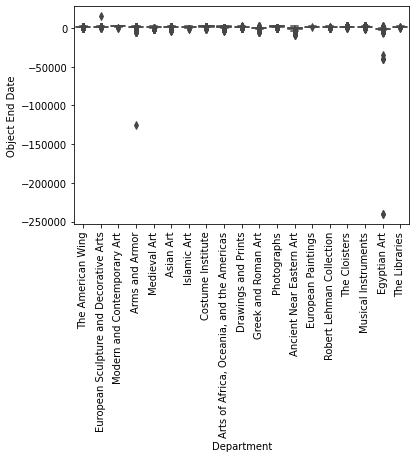

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
100045,04.9.19,False,False,True,188903,<NA>,European Sculpture and Decorative Arts,1904-01-01,Bowl,Wide-rimmed bowl with Vulcan Forging Arms with...,"Italian, probably Urbino",NaN,NaN,NaN,NaN,3312,Artist,NaN,Fra Xanto Avelli da Rovigo,ca. 1486–1582,NaN,Avelli da Rovigo Fra Xanto,NaN,1486,1582,NaN,NaN,https://www.wikidata.org/wiki/Q1643071,ca. 1528–30,1523,15335,Maiolica (tin-glazed earthenware),Overall (confirmed): 1 1/2 × 10 1/2 in. (3.8 ×...,"Rogers Fund, 1904",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics-Pottery,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",Cupid|Venus|Vulcan|Bowls,http://vocab.getty.edu/page/aat/300380105|http...,https://www.wikidata.org/wiki/Q5011|https://ww...
36625,21.175.114,False,False,True,42751,<NA>,Asian Art,1921-01-01,Tomb piece,NaN,China,Late Neolithic period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 4000 B.C.,-4050,-3950,Nephrite,H. 5 in. (12.7 cm); W. 2 3/4 in. (7 cm),"Bequest of Edmund C. Converse, 1921",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Jade,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
342708,33.4.59,False,False,True,547178,<NA>,Egyptian Art,1933-01-01,"Food, grain, burned",Sample of Grain from Merimda,NaN,Neolithic Period–Predynastic Period,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 4500–4000 B.C.,-4500,-4000,Burned Grain,NaN,"Gift of Albert Rothbart, 1933",From,NaN,NaN,NaN,Egypt,Western Delta,Merimda Beni Salama,NaN,NaN,Vienna Academy of Science excavations 1929–30,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",Food,http://vocab.getty.edu/page/aat/300254496,https://www.wikidata.org/wiki/Q2095
352224,32.2.33,False,False,False,557616,101,Egyptian Art,1932-01-01,"Bowl, black topped",Black-topped brown ware bowl,NaN,"Predynastic, Late Naqada l–Naqada II",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 4500–4000 B.C.,-4500,-4000,Pottery,H. 12.5 cm (4 15/16 in); diam. 13 cm (5 1/8 in),"Rogers Fund, 1932",From,NaN,NaN,NaN,Egypt,Northern Upper Egypt,Matmar,Cemetery 3100,Thrown out of grave,"BSAE/Brunton excavations, 1931",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
352218,32.2.35,False,False,True,557589,<NA>,Egyptian Art,1932-01-01,"Bowl, rough red pottery",Bowl,NaN,"Predynastic, Late Naqada l–Naqada II",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 4500–4000 B.C.,-4500,-4000,Pottery,H. 11 cm (4 5/16 in); diam. 23 cm (9 1/16 in),"Rogers Fund, 1932",From,NaN,NaN,NaN,Egypt,Northern Upper Egypt,Matmar,Cemetery 3100,Thrown out of grave,"BSAE/Brunton excavations, 1931",NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN


In [138]:
#Pro hledání odlehlých hodnot jsem zvolil stáří předmětu, budu používat sloupec 
#"Object End Date", protože obsahuje už připravenou číselnou hodnotu narozdíl od sloupce 
#"Object Date", který často obsahuje mnoho dalších nestrukturovaných informací.
#Hodnota není nikdy příliš vzdálená (mimo několika zřejmých překlepů) od hodnoty 
#"Object Begin Date", proto lze použít kteroukoliv z nich.
ax = sns.boxplot(x='Department', y='Object End Date', data=df_converted)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show() #Některá oddělení mají shluky s výrazně odlehlými hodnotami

display(df_converted[AgeOut].sort_values(['Object End Date'], ascending = False).head())#Některé hodnoty jsou vyšší než letošní rok, jasné překlepy
#Oprava překlepů v hodnotách
df.at[100045, 'Object End Date'] = 1535
df.at[246733, 'Object End Date'] = 1870
df.at[231374, 'Object End Date'] = 1835

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
2396,Inst.68.6.2,False,False,False,2586,<NA>,The American Wing,NaT,Frame,Frame,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,"Compo, gold leaf",Sight: 35 1/2 x 25 1/2 in. (90.2 x 64.8 cm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Frames,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
11886,1997.114,False,False,False,12942,<NA>,The American Wing,1997-01-01,"Painting, miniature",Peter McGregor,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Watercolor on ivory,1 x 1 1/8 in. (2.5 x 2.9 cm),"Gift of Joseph Veach Noble, 1997",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Paintings,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q20176779,NaT,"Metropolitan Museum of Art, New York, NY",Men|Portraits,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...
13349,07.251.27,False,False,True,14546,<NA>,The American Wing,1907-01-01,Medal,Washington and Franklin,American,NaN,NaN,NaN,NaN,131,Artist,NaN,Joseph H. Merriam,NaN,NaN,"Merriam, Joseph H.",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,White metal,Diam. 1 1/4 in. (3.2 cm),"Gift of Mr. and Mrs. F. S. Wait, 1907",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",George Washington|Profiles|Benjamin Franklin,http://vocab.getty.edu/page/ulan/500126198|htt...,https://www.wikidata.org/wiki/Q23|https://www....
13486,09.165.5,False,False,False,14683,<NA>,The American Wing,1909-01-01,Medal,Athletics,American,NaN,NaN,NaN,NaN,336,Artist,NaN,Arthus Bertrand,NaN,NaN,"Bertrand, Authus",NaN,NaN,9999,NaN,NaN,NaN,NaN,0,0,Bronze,Diam. 2 3/4 in. (7 cm),"Gift of Mr. and Mrs. F. S. Wait, 1909",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",Men|Athletes,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...
13523,X.199.2,False,False,False,14720,<NA>,The American Wing,NaT,Sculpture,William Henry Seward,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Paper mache (?),4 1/2 in. Diam. (11.43 cm Diam.),Museum Accession,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Natural Substances,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",Men|Profiles,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474482,67.630.117,False,False,False,843984,<NA>,Drawings and Prints,NaT,Print,Prin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,Mezzotint,NaN,"Bequest of Susan Dwight Bliss, 1966",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Prints,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
474483,35.3.333b.1–.2,False,False,False,844004,<NA>

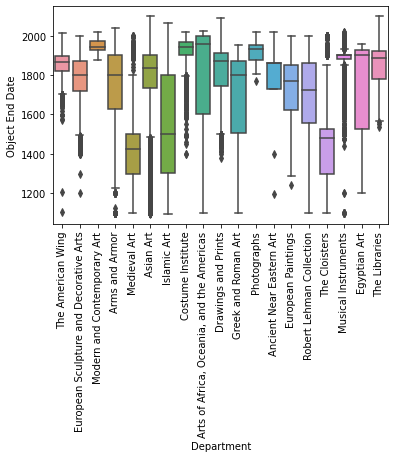

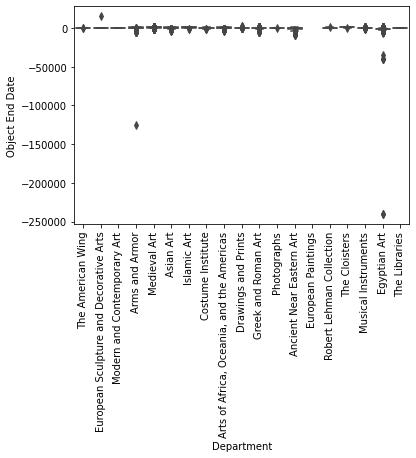

In [139]:
Q1 = df_converted.quantile(0.25)
Q3 = df_converted.quantile(0.75)
IQR =  Q3 - Q1

AgeOut = (df_converted['Object End Date'] > Q3['Object End Date'] + 1.5*IQR['Object End Date']) | (df_converted['Object End Date'] < Q1['Object End Date'] - 1.5*IQR['Object End Date'])
display(df_converted[AgeOut])


ax = sns.boxplot(x='Department', y='Object End Date', data=df_converted[~AgeOut])
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show() #Nyní je vidět že jsme se zbavili odlehlých shluků

ax = sns.boxplot(x='Department', y='Object End Date', data=df_converted[AgeOut])
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show() #Ale je také vidět že jsme se zbavili mnoha hodnot, které nejsou tolik odlehlé,
           #Stejný problém se děje i když symetricky zvětšíme IQR

,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constiuent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
42872,1998.488.2,False,False,True,49818,<NA>,Asian Art,1998-01-01,Frieze section,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Modern,1950,2099,Red sandstone,H. 3 in. (7.6 cm); W. 7 15/16 in. (20.2 cm); L...,"Gift of Jeffrey B. Soref, in honor of Martin L...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sculpture,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
100045,04.9.19,False,False,True,188903,<NA>,European Sculpture and Decorative Arts,1904-01-01,Bowl,Wide-rimmed bowl with Vulcan Forging Arms with...,"Italian, probably Urbino",NaN,NaN,NaN,NaN,3312,Artist,NaN,Fra Xanto Avelli da Rovigo,ca. 1486–1582,NaN,Avelli da Rovigo Fra Xanto,NaN,1486,1582,NaN,NaN,https://www.wikidata.org/wiki/Q1643071,ca. 1528–30,1523,15335,Maiolica (tin-glazed earthenware),Overall (confirmed): 1 1/2 × 10 1/2 in. (3.8 ×...,"Rogers Fund, 1904",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ceramics-Pottery,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",Cupid|Venus|Vulcan|Bowls,http://vocab.getty.edu/page/aat/300380105|http...,https://www.wikidata.org/wiki/Q5011|https://ww...
193796,1999.47.327,False,False,False,317192,<NA>,"Arts of Africa, Oceania, and the Americas",1999-01-01,Ear ornament,Ear or Sideburn Ornament,Shuar or Achuar (?),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20th century,1875,2025,"Feathers, seeds, cotton",Height 4 in.,"Bequest of John B. Elliott, 1997",NaN,NaN,NaN,NaN,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,Textiles-Featherwork,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
193797,1999.47.328,False,False,False,317193,<NA>,"Arts of Africa, Oceania, and the Americas",1999-01-01,Ear ornament,Ear or Sideburn Ornament,Shuar or Achuar (?),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20th century,1875,2025,"Feathers, seeds, cotton",Height 4 in.,"Bequest of John B. Elliott, 1997",NaN,NaN,NaN,NaN,Ecuador,NaN,NaN,NaN,NaN,NaN,NaN,Textiles-Featherwork,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
193798,1999.47.329,False,False,False,317194,<NA>,"Arts of Africa, Oceania, and the Americas",1999-01-01,Skirt,Woman's Shell and Beaded Skirt,Shuar or Achuar (?),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20th century,1875,2025,"Shell, seeds, bone, cotton",Height 9 in.,"Bequest of John B. Elliott, 1997",NaN,NaN,NaN,NaN,Ecuador,Oriente region,NaN,NaN,NaN,NaN,NaN,Shell-Costumes,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaT,"Metropolitan Museum of Art, New York, NY",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448757,2019.290.13,False,False,False,772746,<NA>,Asian Art,2019-01-01,Framed hanging scroll,NaN,China,NaN,NaN,NaN,NaN,1982,Artist,NaN,Wang Naizhuang,"Chinese, born 1929",NaN,Wang Naizhuang,NaN,1929,NaN,NaN,NaN,NaN,Undated,1929,2029,Framed hanging scroll; ink and color on paper\t,Image: 18 7/8 × 17 1/8 in. (48 × 43.5 cm),"Bequest 

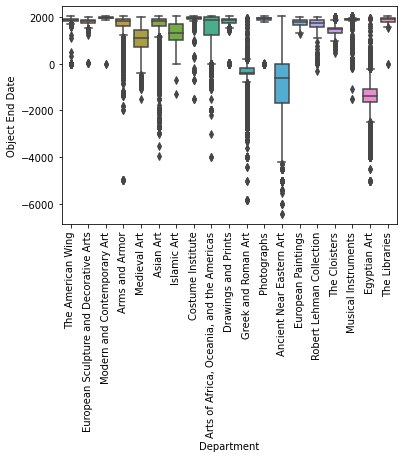

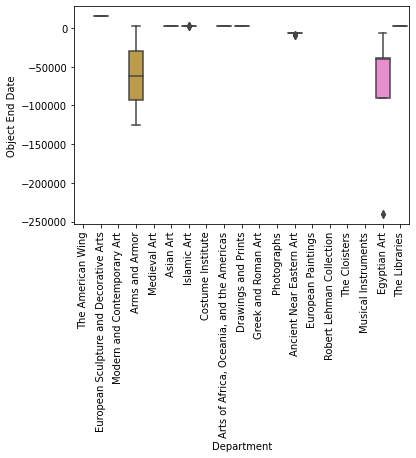

In [140]:
#Druhá možnost - vhodně zvolená horní a dolní hrana tak, aby jsme označili jen odlehlé shluky
bounds = (df_converted['Object End Date'] > 2020) | (df_converted['Object End Date'] < -6500)
display(df_converted[bounds])

ax = sns.boxplot(x='Department', y='Object End Date', data=df_converted[~bounds])
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show() #Nyní je vidět že jsme se zbavili odlehlých shluků

ax = sns.boxplot(x='Department', y='Object End Date', data=df_converted[bounds])
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show() #Ale je také vidět že jsme označili mnoho hodnot, které nejsou tolik odlehlé.

#6 - Detect missing data in at least three features, convert them to a proper representation (if they are already not), and impute missing values in at least one feature.

In [141]:
#Žádná z hodnot složená pouze z | mi nedává jinou informaci o neznámé hodnotě, proto je konvertuju na NaN.
display('Před: ' + str(df_converted['Artist Gender'].nunique()))

def clean_line(x):
  if bool(re.match(r'^\|+$', str(x))):
    return np.nan
  return x

display('Po: ' + str(df_converted['Artist Gender'].apply(clean_line).nunique()))

'Před: 276'

'Po: 230'

In [142]:
#Stejná myšlenka je využita i pro 'Artist ULAN URL' a 'Artist Wikidata URL'.
display('Artist ULAN URL')
display('Před: ' + str(df_converted['Artist ULAN URL'].nunique()))
display('Po: ' + str(df_converted['Artist ULAN URL'].apply(clean_line).nunique()))


display('Artist Wikidata URL')
display('Před: ' + str(df_converted['Artist Wikidata URL'].nunique()))
display('Po: ' + str(df_converted['Artist Wikidata URL'].apply(clean_line).nunique()))

'Artist ULAN URL'

'Před: 34159'

'Po: 34142'

'Artist Wikidata URL'

'Před: 14170'

'Po: 14140'

In [143]:
#'AccessionYear' má relativně jen několik chybějících hodnot, proto je dopočítám.
#Nejdříve pomocí mediánu.
df_converted[df_converted['AccessionYear'].isnull()]
df_converted['AccessionYearFloat'] = df_converted['AccessionYear'].apply(lambda x: x.year)
medians = df_converted.groupby('Department').AccessionYearFloat.median()
df_converted.loc[df_converted['AccessionYear'].isnull(), 'AccessionYearFloat'] = df_converted\
.loc[df_converted['AccessionYear'].isnull(),'Department'].apply(lambda x: medians[x])

df_converted['AccessionYear'] = convertToDate(df_converted['AccessionYearFloat'])
df_converted = df_converted.drop('AccessionYearFloat', axis = 1)

In [144]:
#Všechny hodnoty jsou teď dosazeny
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474526 entries, 0 to 474525
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            474526 non-null  object        
 1   Is Highlight             474526 non-null  bool          
 2   Is Timeline Work         474526 non-null  bool          
 3   Is Public Domain         474526 non-null  bool          
 4   Object ID                474526 non-null  int64         
 5   Gallery Number           54386 non-null   Int32         
 6   Department               474526 non-null  category      
 7   AccessionYear            474526 non-null  datetime64[ns]
 8   Object Name              473172 non-null  object        
 9   Title                    444655 non-null  object        
 10  Culture                  206456 non-null  object        
 11  Period                   90362 non-null   object        
 12  Dynasty         